📝<sup>Este archivo va sin tildes para prevenir posible errores o alertas en la ejecucion</sup>

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from functions import prettyColumNames

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Configuramos pandas para que muestre todas las columnas en salidas tales como .head()

In [2]:
pd.options.display.max_columns = None

## Extración de los datos

In [3]:
dfHechos = pd.read_excel('../datasource/homicidios.xlsx', sheet_name = 'HECHOS', engine = 'openpyxl')
dfVictimas = pd.read_excel('../datasource/homicidios.xlsx', sheet_name = 'VICTIMAS', engine = 'openpyxl')

## Transformación

### Descripcion General

In [4]:
dfHechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [5]:
dfHechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [6]:
dfHechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Cambiaremos todos los valores "SD" (Sin datos) en dfHechos a NaN. Con este cambio ayudaremos a las funciones de pandas a identificar valores faltantes (NaN).

In [7]:
# Buscar los valores 'SD' en todas las columnas del dataframe
resultados = dfHechos.apply(lambda x: x.map(lambda y: y == 'SD' or y == 'sd')).any()

# Filtrar las columnas que contienen valores 'SD'
columnasConSd = resultados[resultados].index.tolist()

# Imprimir las columnas que contienen valores 'SD'
print('columnas que contienen valores "SD":\n', columnasConSd)

columnas que contienen valores "SD":
 ['HORA', 'HH', 'LUGAR_DEL_HECHO', 'VICTIMA', 'ACUSADO']


In [8]:
dfHechos.replace(['SD','sd'], pd.NA, inplace = True)

#### Resumen

En un prime vistazo podemos resumir que:
  - Es un dataset de apenas 696 filas. Aunque es una buena practica, no es crucial hacer todo lo posible para ahorrar recursos de memoria. 
  - La gran mayoria de las columnas no contienen valores nulos.
  - La columna 'Calle' apenas tiene un valor nulo. Profundizaremos en la busqueda de un valor para este registro.
  - Las columnas 'Atura' y 'Cruce' tienen muchos valores nulos. Son candidatas a no ser tomadas en cuenta para analisis posteriores (EDA)
  - La columna 'Direccion Normalizada' tiene pocos datos nulos. Profundizaremos en la busqueda de un valor para este registro.
  - La nombres de las columnas no son consistentes, unos en minusculas, otros en mayusculas, algunas palabras han sido separada con guion bajo.
  - Hay valores 'SD' que según el diccionario significa 'sin dato' lo que impide contarlos como datos nulos (faltante).
  - La columna 'HH' deberia ser de tipo entero.

Investigaremos la composicion de los datos en dos secciones distintas, la primera investigacion la haremos sobre el dataframe dfHechos y en la segunda etapa nos concentraremos en el dataframe dfVictimas.

### Hechos

Investigación de composicion del dataframe __dfHechos__.<br>
Vamos a visualizar como estan agrupados los datos, ver sus tipos, cuantos son, nombres de columnas. A partir de esta<br> primera observacion podremos tomar algunas decisiones de accion.

In [9]:
dfHechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   695 non-null    object        
 7   HH                     695 non-null    object        
 8   LUGAR_DEL_HECHO        695 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Como buena practica, unificaremos el criterio para nombrar las columnas. Decidimos que deben estar en mayusculas y las palabras mejor que esten separadas por un guion bajo

In [10]:
prettyColumNames(dfHechos)

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'CALLE', 'ALTURA', 'CRUCE',
       'DIRECCIÓN_NORMALIZADA', 'COMUNA', 'XY_(CABA)', 'POS_X', 'POS_Y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

Para prevenir incompatibilidad con otros entornos, frameworks, lenguajes, etc, quitaremos las tildes el los titulos de columnas.

In [11]:
dfHechos.rename(columns = {'DIRECCIÓN_NORMALIZADA': 'DIRECCION_NORMALIZADA'}, inplace = True)

¿Los IDs se repiten?

In [12]:
if dfHechos['ID'].nunique() == dfHechos.shape[0]: 
  print('No hay IDs repetidos')
else:
  print(f'Hay {dfHechos.shape[0] - dfHechos["ID"].nunique()} IDs repetidos')

No hay IDs repetidos


#### Veamos las columnas __NO NUMERICAS__

In [13]:
dfHechos.describe(exclude = 'number')

,ID,FECHA,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,DIRECCION_NORMALIZADA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
count,696,696,695,695.0,695,696,695,525,688,696,696,696,696,687,673
unique,696,NaN,374,24.0,682,4,279,317,635,606,605,605,41,9,9
top,2016-0001,NaN,16:00:00,7.0,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,"PAZ, GRAL. AV.","PAZ, GRAL. AV.",27 DE FEBRERO AV. y ESCALADA AV.,Point (. .),.,.,PEATON-PASAJEROS,MOTO,AUTO
freq,1,NaN,10,41.0,4,429,57,14,5,14,12,12,105,295,204
mean,NaN,2018-09-14 05:12:24.827586048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2017-04-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2018-07-12 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2020-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2021-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cambiaremos todos los valores "SD" (Sin datos) a NaN. Con este cambio ayudaremos a las funciones de pandas a identificar valores faltantes (NaN).

In [14]:
dfHechos.replace(['SD','sd'], float('nan'), inplace = True)

La columna 'HH' deberia ser de tipo entero. Los enteros ocupan poco espacio en memoria.

In [15]:
# El parametro 'downcast' intentara reducir el tipo de dato al tamaño más pequeño posible,
# manteniendo la precisión de los datos.
dfHechos['HH'] = pd.to_numeric(dfHechos['HH'], errors = 'coerce', downcast = 'integer')
dfHechos['HH'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 696 entries, 0 to 695
Series name: HH
Non-Null Count  Dtype  
--------------  -----  
695 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


⬆️ La columna 'HH' ahora es de tipo numerica (float64) pero no es de tipo int porque la columna contiene un NaN.<br>
Seguiremos explorando esta columna 'HH' en la seccion de variables numericas.

¿Faltan datos en las columnas?

In [16]:
len = dfHechos.shape[0]
n = dfHechos.shape[0]
print(f'COLUMNA               FALTAN     %\n--------------------------------------')
print(f'FECHA{" " * 17}{len - dfHechos["FECHA"].count()}{" " * 11}{round(100 - (dfHechos["FECHA"].count() * 100) / len, 2)}')
print(f'HORA{" " * 18}{len - dfHechos["HORA"].count()}{" " * 11}{round(100 - (dfHechos["HORA"].count() * 100) / len, 2)}')
print(f'CALLE{" " * 17}{len - dfHechos["CALLE"].count()}{" " * 11}{round(100 - (dfHechos["CALLE"].count() * 100) / len, 2)}')
print(f'CRUCE{" " * 17}{len - dfHechos["CRUCE"].count()}{" " * 8}{round(100 - (dfHechos["CRUCE"].count() * 100) / len, 2)}')
print(f'DIRECCION_NORMALIZADA {len - dfHechos["DIRECCION_NORMALIZADA"].count()}{" " * 11}{round(100 - (dfHechos["DIRECCION_NORMALIZADA"].count() * 100) / len, 2)}')
print(f'PARTICIPANTES{" " * 9}{len - dfHechos["PARTICIPANTES"].count()}{" " * 11}{round(100 - (dfHechos["PARTICIPANTES"].count() * 100) / len, 2)}')
print(f'VICTIMA{" " * 15}{len - dfHechos["VICTIMA"].count()}{" " * 11}{round(100 - (dfHechos["VICTIMA"].count() * 100) / len, 2)}')
print(f'ACUSADO{" " * 15}{len - dfHechos["ACUSADO"].count()}{" " * 10}{round(100 - (dfHechos["ACUSADO"].count() * 100) / len, 2)}')

COLUMNA               FALTAN     %
--------------------------------------
FECHA                 0           0.0
HORA                  1           0.14
CALLE                 1           0.14
CRUCE                 171        24.57
DIRECCION_NORMALIZADA 8           1.15
PARTICIPANTES         0           0.0
VICTIMA               9           1.29
ACUSADO               23          3.3


🏛️ Exploremos la columna 'FECHA'

In [17]:
dfHechos['FECHA'].describe()

count                              696
mean     2018-09-14 05:12:24.827586048
min                2016-01-01 00:00:00
25%                2017-04-02 12:00:00
50%                2018-07-12 12:00:00
75%                2020-01-04 06:00:00
max                2021-12-30 00:00:00
Name: FECHA, dtype: object

Detección de outliers con __z-score__ en la columna FECHA de dfHechos

Calcular el z-score para cada valor de la columna FECHA

In [18]:
#calulamos la fecha media
mediaFecha = dfHechos['FECHA'].mean()
#calculamos la desviacion estandar
desviacionEstandarFecha = dfHechos['FECHA'].std()
#calculamos el z-score para cada valor
zscores = np.abs(dfHechos['FECHA'] - mediaFecha) / desviacionEstandarFecha


Identificar los valores con z-score mayor a 3 desviaciones estándar por encima de la media o menor a 3 desviaciones estándar por debajo de la media.

In [19]:
outliers = dfHechos[zscores > 3]

In [20]:
if outliers.empty:
  print('No se encontraron valores atipicos en la columna "FECHA" con el metodo z-score')
else:
  print(f'Se encontraron {outliers.shape[0]} valores atipicos en la columna "FECHA" con el metodo z-score')
  dfHechos = dfHechos.drop(outliers.index)

No se encontraron valores atipicos en la columna "FECHA" con el metodo z-score


En el diagrama de dispersion vemos una clarisima distribucion sin outliers


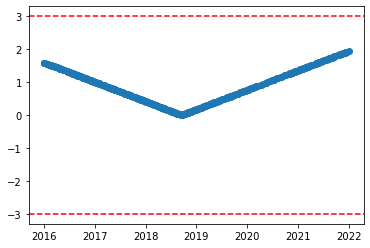

In [21]:
plt.scatter(dfHechos['FECHA'], zscores)
plt.axhline(3, color='red', linestyle='dashed')
plt.axhline(-3, color='red', linestyle='dashed')
print('En el diagrama de dispersion vemos una clarisima distribucion sin outliers')
plt.show()

Representacion grafica de la distribucion de frecuencia de las fechas


Text(0, 0.5, 'Hechos')

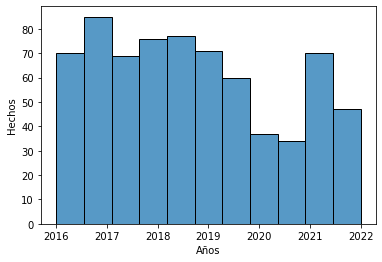

In [22]:
# Create a histogram using Seaborn
print('Representacion grafica de la distribucion de frecuencia de las fechas')
g = sns.histplot(data = dfHechos, x = 'FECHA')
# Add labels
g.set_xlabel('Años')
g.set_ylabel('Hechos')

No se aprecia una distribucion normal de las fechas (no gaussiana). Fechas anteriores al 2016 o posteriores al 2021 no son observables.

🏛️ Exploremos la columna 'HORA'

In [23]:
dfHechos['HORA'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 696 entries, 0 to 695
Series name: HORA
Non-Null Count  Dtype 
--------------  ----- 
695 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


In [24]:
dfHechos[dfHechos['HORA'].isnull()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,ALTURA,CRUCE,DIRECCION_NORMALIZADA,COMUNA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,<NA>,NaN,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",NaN,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [25]:
dfHechos['HORA'].describe()

count          695
unique         374
top       16:00:00
freq            10
Name: HORA, dtype: object

In [26]:
# Imprimir los valores distintos en la columna 'HORAS'
print("Valores distintos en la columna 'HORAS':\n", dfHechos['HORA'].unique())

Valores distintos en la columna 'HORAS':
 [datetime.time(4, 0) datetime.time(1, 15) datetime.time(7, 0)
 datetime.time(0, 0) datetime.time(5, 20) datetime.time(18, 30)
 datetime.time(19, 10) datetime.time(15, 20) datetime.time(1, 20)
 datetime.time(11, 30) datetime.time(5, 14) datetime.time(22, 0)
 datetime.time(16, 54) datetime.time(9, 30) datetime.time(16, 0)
 datetime.time(23, 35) datetime.time(6, 0) datetime.time(4, 50)
 datetime.time(7, 30) datetime.time(9, 35) datetime.time(10, 0)
 datetime.time(17, 30) datetime.time(12, 30) datetime.time(0, 15)
 datetime.time(11, 0) datetime.time(8, 6) datetime.time(1, 50)
 datetime.time(18, 15) datetime.time(19, 40) datetime.time(10, 25)
 datetime.time(5, 30) datetime.time(17, 40) datetime.time(9, 50)
 datetime.time(20, 0) datetime.time(21, 0) datetime.time(20, 30)
 datetime.time(4, 45) datetime.time(14, 0) datetime.time(16, 30)
 datetime.time(18, 11) datetime.time(14, 40) datetime.time(17, 0)
 datetime.time(3, 30) datetime.time(15, 0) datetime

En los valores distitos de la columna 'HORA' notamos que tiene dos tipos de datos, uno con datetime.time() y otro una cadena de texto con el formato 'hh:mm:ss'<br>
Unificaremos todo al tipo de dat datetime.time()

In [27]:
dfHechos['HORA'] = pd.to_datetime(dfHechos['HORA'], format = '%H:%M:%S').dt.time

Busquemos la hora que falta fijandonos en el dataframe dfVictimas. Busquemos la victima con 'ID_hecho' igual a '2019-0103'. 

In [28]:
dfVictimas[dfVictimas['ID_hecho'] == '2019-0103']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
537,2019-0103,2019-12-18,2019,12,18,CONDUCTOR,MOTO,MASCULINO,24,2019-12-18 00:00:00


Metamos la lupa a la columna 'FECHA' para ver la hora.

In [29]:
dfVictimas[dfVictimas['ID_hecho'] == '2019-0103']['FECHA'].dt.time

537    00:00:00
Name: FECHA, dtype: object

Claramente la hora exacta de suceso no fue capturada y en su lugar quedo registrado un dato por defecto, en este caso ‘00:00:00’. Al no encontrar datos para la hora, entonces ...

Imputaremos la unica hora faltante ubicandola en la media de la columna 'HORA'.

Busquemos la hora media en la columna 'HORA'

In [30]:
# Convertir la columna 'HORA' al formato de minutos transcurridos desde la medianoche
horaAMinutos = dfHechos['HORA'].apply(lambda x: x.hour * 60 + x.minute)

# Calcular la media de 'HORA' en minutos
mediaHoraAMinutos = horaAMinutos.mean()

# Convertir la media de minutos de vuelta al formato de hora
mediaEnHora = divmod(mediaHoraAMinutos, 60)

# Mostrar la media en formato de hora
print(f'La media de la columna "HORA" es: {mediaEnHora[0]}:{mediaEnHora[1]}')

La media de la columna "HORA" es: 12.0:1.3525179856114846


In [31]:
# Reemplazar los valores NaN en la columna 'HORA' por la media calculada
dfHechos['HORA'].fillna(pd.to_datetime(f"{int(mediaEnHora[0]):02d}:{int(mediaEnHora[1]):02d}").time(), inplace=True)

In [32]:
dfHechos['HORA'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 696 entries, 0 to 695
Series name: HORA
Non-Null Count  Dtype 
--------------  ----- 
696 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


In [33]:
# Mostrar el tipo de dato de la columna 'HORA'
print(dfHechos['HORA'].dtype)

# Mostrar la cantidad de valores nulos en la columna 'HORA'
print('nulos:', dfHechos['HORA'].isnull().sum())

# Mostrar los primeros 5 valores de la columna 'HORA'
print(dfHechos['HORA'].head())

object
nulos: 0
0    04:00:00
1    01:15:00
2    07:00:00
3    00:00:00
4    05:20:00
Name: HORA, dtype: object


🏛️ Exploremos la columna __'CALLE'__

In [34]:
dfHechos.loc[dfHechos['CALLE'].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,ALTURA,CRUCE,DIRECCION_NORMALIZADA,COMUNA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20.0,<NA>,CALLE,NaN,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,<NA>


Sin datos en las columnas 'LUGAR_DEL_HECHO', 'ALTURA', 'CRUCE', 'DIRECCION_NORMALIZADA', 'XY_(CABA)',<br>'POS_X', 'POS_Y' no contamos con pistas para determinar la calle en la que ocurrio el hecho.<br>
⬆️Mas adelante en el analisis, intentando encontrar datos en otras columnas de esta fila, tomamos la decision de que la columna no es salvable. Esta columna termino siendo eliminada.

Contemos la cantidad de valores diferentes que se tienen en 'CALLE' para verificar que esta columna categorica no tenga un solo nivel.<br>
Si tiene un solo subnivel, borraremos la columna.

In [35]:
print(f'Columna "CALLE:" {dfHechos["CALLE"].nunique()} subniveles')

Columna "CALLE:" 279 subniveles


In [36]:
dfHechos['CALLE'].value_counts()

CALLE
PAZ, GRAL. AV.                                57
RIVADAVIA AV.                                 19
DEL LIBERTADOR AV.                            18
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    14
ALBERDI, JUAN BAUTISTA AV.                    13
                                              ..
PILCOMAYO                                      1
CERVANTES                                      1
CONGRESO AV.                                   1
AUSTRALIA AV.                                  1
PADRE CARLOS MUJICA                            1
Name: count, Length: 279, dtype: int64

🏛️ Exploremos la columna __'LUGAR_DEL_HECHO'__

Quitemos los espacios en blanco de la columna

In [37]:
# Eliminar los espacios en blanco a la derecha del texto en la columna 'LUGAR_DEL_HECHO'
dfHechos['LUGAR_DEL_HECHO'] = dfHechos['LUGAR_DEL_HECHO'].str.rstrip()

🏛️ Exploremos la columna __'CRUCE'__

Al faltar casi 1/4 de los datos de la columna 'CRUCE' hemos tomado la decision de asumir que el dato faltante indica que el hecho no ocurrio en un cruce. Entonces el dato es valido al tener valor NaN.

🏛️ Exploremos la columna __'DIRECCION_NORMALIZADA'__

🗣️ Ya que contamos con las columnas 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE' y 'CALLE', prescindiremos de esta columna.

In [38]:
dfHechos = dfHechos.drop('DIRECCION_NORMALIZADA', axis=1)

🏛️ Exploremos la columna __'PARTICIPANTES'__

In [39]:
dfHechos['PARTICIPANTES'].value_counts()

PARTICIPANTES
PEATON-PASAJEROS       105
MOTO-AUTO               83
MOTO-CARGAS             78
PEATON-AUTO             77
MOTO-PASAJEROS          46
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               31
PEATON-MOTO             30
MOTO-MOTO               25
AUTO-OBJETO FIJO        22
MULTIPLE                17
AUTO-CARGAS             14
BICICLETA-CARGAS        10
AUTO-PASAJEROS           9
MOTO-SD                  9
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
SD-SD                    5
PEATON-BICICLETA         5
AUTO-SD                  4
CARGAS-CARGAS            4
PEATON-SD                4
PASAJEROS-PASAJEROS      3
MOTO-OTRO                2
MOTO-BICICLETA           2
SD-AUTO                  2
MOTO-MOVIL               2
CARGAS-OBJETO FIJO       1
CARGAS-AUTO              1
MOVIL-PASAJEROS          1
SD-CARGAS                1
SD-MOTO                  1
MOVIL-CARGAS             1
PASAJEROS-AUTO           1
AUTO-MOVIL               1
CARGAS-PASAJER

En los valores de la columna 'PARTICIPANTES' sustituiremos el guion medio que separa las palabras por el guion bajo.<br>Esto es porque queremos
seguir siendo consistentes con los separadores de palabras en los nombre de columna.

In [40]:
dfHechos['PARTICIPANTES'] = dfHechos['PARTICIPANTES'].str.replace('-', '_')

Tambien sustituiremos 'SD_SD' por NaN ya que en realidad no hay datos para estos valores.

In [41]:
dfHechos['PARTICIPANTES'] = dfHechos['PARTICIPANTES'].replace('SD_SD', float('nan'))

In [42]:
dfHechos[dfHechos['PARTICIPANTES'].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,ALTURA,CRUCE,COMUNA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0.0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,NaN,4,Point (. .),-58.37714647568196,-34.63657525428238,NaN,<NA>,<NA>
76,2016-0101,1,2016-08-07,2016,8,7,19:42:00,19.0,AV GRAL PAZ Y JORGE CHAVEZ,GRAL PAZ,"PAZ, GRAL. AV.",NaN,"CHAVEZ, JORGE",9,Point (93946.81673714 97681.68907836),-58.52932872,-34.65014993,NaN,<NA>,<NA>
92,2016-0119,1,2016-09-04,2016,9,4,06:40:00,6.0,CRISOLOGO LARRALDE Y AVDA TRIUNVIRATO,AVENIDA,"LARRALDE, CRISOLOGO AV.",NaN,TRIUNVIRATO AV.,12,Point (96944.69676081 107291.52292157),-58.49659234,-34.56353635,NaN,<NA>,<NA>
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0.0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,NaN,0,Point (. .),.,.,NaN,<NA>,<NA>
201,2017-0074,1,2017-06-04,2017,6,4,12:50:00,12.0,CASCO 133,CALLE,CASCO,133.0,NaN,9,Point (94281.31244858 99043.29027489),-58.52567073,-34.63787791,NaN,<NA>,<NA>


Vamos a buscar pistas en dfVictimas para ver si podemos completar los valores faltantes en la columna 'PARTICIPANTES'<br>de dfHechos

In [43]:
ids = ['2016-0049', '2016-0101', '2016-0119', '2016-0174', '2016-0074']
d = pd.DataFrame(columns=['ID_hecho', 'ROL', 'VICTIMA'])

for id in ids:
    row = dfVictimas[dfVictimas['ID_hecho'] == id][['ID_hecho', 'ROL', 'VICTIMA']]
    d = pd.concat([d, row], ignore_index=True)
# Mostrar el contenido de d
print('dataframe dfVictimas')
d

dataframe dfVictimas


,ID_hecho,ROL,VICTIMA
0,2016-0049,SD,SD
1,2016-0101,SD,SD
2,2016-0119,PASAJERO_ACOMPAÑANTE,SD
3,2016-0174,SD,SD
4,2016-0074,CONDUCTOR,AUTO


En el dataframe dfVictimas podemo ver que hay dos hechos (2016-0119 y 2016-0074) que tienen datos utiles para completar en dfHechos. Actualizaremos los valores en la columna 'PARTICIPANTES' segun lo encontrado en dfVictimas

In [44]:
dfHechos.loc[dfHechos['ID'] == '2016-0119', 'PARTICIPANTES'] = 'PASAJEROS_SD'
dfHechos.loc[dfHechos['ID'] == '2016-0074', 'PARTICIPANTES'] = 'AUTO_SD'

Imputaremos los tres faltantes con las tres categorias mas comunes.

In [45]:
dfHechos.loc[dfHechos['ID'] == '2016-0049', 'PARTICIPANTES'] = 'PEATON-PASAJEROS'
dfHechos.loc[dfHechos['ID'] == '2016-0101', 'PARTICIPANTES'] = 'MOTO-AUTO'
dfHechos.loc[dfHechos['ID'] == '2016-0174', 'PARTICIPANTES'] = 'MOTO-CARGAS'

Veamos un panorama grafico de la columna 'PARTICIPANTES'

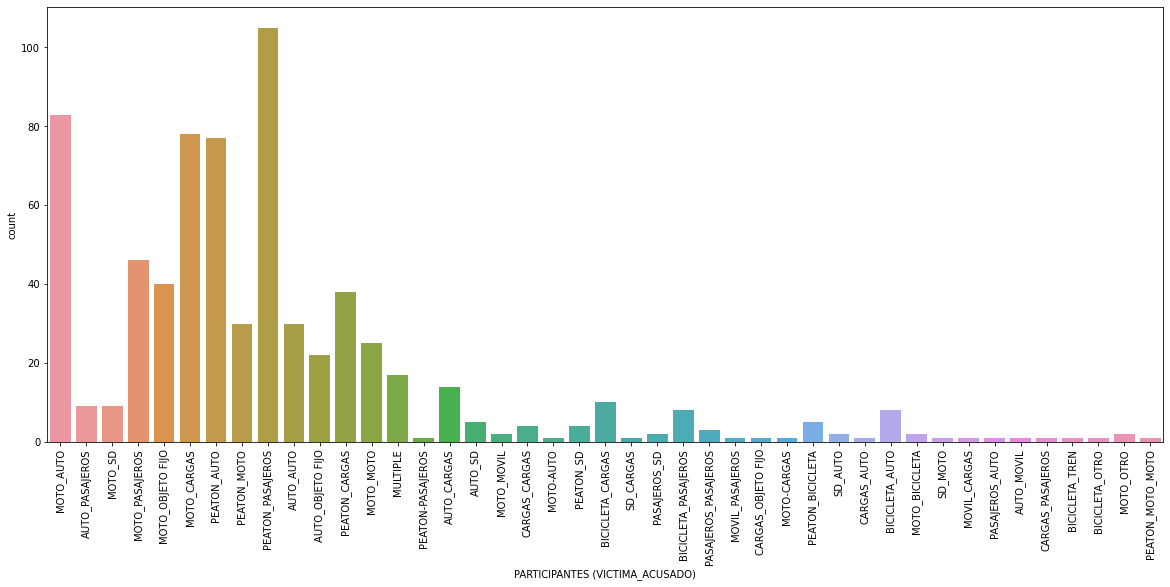

In [46]:
# Ajustar el tamaño de la figura
plt.figure(figsize = (20, 8))

# Crear el countplot para la columna 'PARTICIPANTES' con nombres de valores en el eje x verticalmente
ax = sns.countplot(x = 'PARTICIPANTES', data = dfHechos)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)  # Rotar los nombres de los valores en el eje x

# Cambiar la etiqueta del eje de las x por 'PARTICIPANTES (VICTIMA_ACUSADO)'
ax.set_xlabel('PARTICIPANTES (VICTIMA_ACUSADO)')
# Mostrar la gráfica
plt.show()


In [47]:
dfHechos.loc[dfHechos['PARTICIPANTES'] == 'PEATON_MOTO_MOTO']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,ALTURA,CRUCE,COMUNA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7.0,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,NaN,ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO_MOTO,PEATON_MOTO,MOTO


En el diccionario el valor 'PEATON_MOTO' para la columna 'PARTICIPANTES' no existe. Lo sustituiremos por 'OTRO_MOTO'.

In [48]:
dfHechos.loc[dfHechos['ID'] == '2020-0063', 'PARTICIPANTES'] = 'OTRO_MOTO'

🏛️ Exploremos la columna __'VICTIMA'__

In [49]:
dfHechos['VICTIMA'].value_counts()

VICTIMA
MOTO           295
PEATON         264
AUTO            83
BICICLETA       29
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

PEATON_MOTO no esta en la lista de valores para esta columna segun el diccionario suministrado.
Vamo a ver mas de cerca esta fila

In [50]:
dfHechos.loc[dfHechos['VICTIMA'] == 'PEATON_MOTO']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,ALTURA,CRUCE,COMUNA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7.0,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,NaN,ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,OTRO_MOTO,PEATON_MOTO,MOTO


Corregiremos el dato en la columna 'VICTIMA' sustituyendo 'PEATON_MOTO' por 'OTRO'

In [51]:
dfHechos.loc[dfHechos['ID'] == '2020-0063', 'VICTIMA'] = 'PEATON'

# Aprovechamos de acomodar la columna 'PARTICIPANTES' en esta fila
dfHechos.loc[dfHechos['ID'] == '2020-0063', 'PARTICIPANTES'] = 'OTRO'

In [52]:
dfHechos[dfHechos['VICTIMA'].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,ALTURA,CRUCE,COMUNA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0.0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,NaN,4,Point (. .),-58.37714647568196,-34.63657525428238,PEATON-PASAJEROS,<NA>,<NA>
76,2016-0101,1,2016-08-07,2016,8,7,19:42:00,19.0,AV GRAL PAZ Y JORGE CHAVEZ,GRAL PAZ,"PAZ, GRAL. AV.",NaN,"CHAVEZ, JORGE",9,Point (93946.81673714 97681.68907836),-58.52932872,-34.65014993,MOTO-AUTO,<NA>,<NA>
88,2016-0115,1,2016-09-02,2016,9,2,11:50:00,11.0,ARIAS Y TRONADOR,CALLE,ARIAS,NaN,TRONADOR,12,Point (97608.87024259 108884.67029908),-58.48935041,-34.54917673,SD_CARGAS,<NA>,CARGAS
92,2016-0119,1,2016-09-04,2016,9,4,06:40:00,6.0,CRISOLOGO LARRALDE Y AVDA TRIUNVIRATO,AVENIDA,"LARRALDE, CRISOLOGO AV.",NaN,TRIUNVIRATO AV.,12,Point (96944.69676081 107291.52292157),-58.49659234,-34.56353635,PASAJEROS_SD,<NA>,<NA>
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0.0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,NaN,0,Point (. .),.,.,MOTO-CARGAS,<NA>,<NA>
164,2017-0029,1,2017-03-07,2017,3,7,02:15:00,2.0,MOZART Y TANDIL,CALLE,MOZART,NaN,TANDIL,9,Point (98009.35575364 97985.81952007),-58.48501341,-34.64742455,SD_AUTO,<NA>,AUTO
201,2017-0074,1,2017-06-04,2017,6,4,12:50:00,12.0,CASCO 133,CALLE,CASCO,133.0,NaN,9,Point (94281.31244858 99043.29027489),-58.52567073,-34.63787791,NaN,<NA>,<NA>
214,2017-0089,1,2017-07-13,2017,7,13,12:05:00,12.0,MARTINIANO LEGUIZAMON 901,CALLE,"LEGUIZAMON, MARTINIANO",901.0,NaN,9,Point (95246.78684010 97935.32361317),-58.51514709,-34.64787051,SD_AUTO,<NA>,AUTO
269,2017-0155,1,2017-12-12,2017,12,12,21:25:41,21.0,AV. RIVADAVIA 6350,AVENIDA,RIVADAVIA AV.,6350.0,NaN,7,Point (100674.98109200 100299.64949548),-58.45593915,-34.62656868,SD_MOTO,<NA>,MOTO


Gracias a la columna 'PARTICIPANTES' podemos recuperar algunos datos.

In [53]:
dfHechos.loc[dfHechos['ID'] == '2016-0049', 'VICTIMA'] = 'PEATON'
dfHechos.loc[dfHechos['ID'] == '2016-0101', 'VICTIMA'] = 'MOTO'
dfHechos.loc[dfHechos['ID'] == '2016-0119', 'VICTIMA'] = 'PASAJERO'
dfHechos.loc[dfHechos['ID'] == '2016-0174', 'VICTIMA'] = 'MOTO'

Hagamos que el tipo de valor nulo de la columna 'VICTIMA' sean el mismo tipo NaN del resto del dataframe

In [54]:
dfHechos['VICTIMA'] = dfHechos['VICTIMA'].fillna(np.nan)

Vamos a buscar pistas en dfVictimas para ver si podemos completar los valores faltantes en la columna 'VICTIMA'<br>de dfHechos

In [55]:
# Los ids de las filas en dfHechos que tienen valor NaN en la columna 'VICTIMA'
ids = dfHechos[dfHechos['VICTIMA'].isna()]['ID'].tolist()
# Creamos un dataframe vacio con las columnas que necesitamos
d = pd.DataFrame(columns=['ID_hecho', 'ROL', 'VICTIMA'])

for id in ids:
    row = dfVictimas[dfVictimas['ID_hecho'] == id][['ID_hecho', 'ROL', 'VICTIMA']]
    d = pd.concat([d, row], ignore_index=True)
# Mostrar el contenido de d
print('dataframe dfVictimas')
d

dataframe dfVictimas


,ID_hecho,ROL,VICTIMA
0,2016-0115,SD,SD
1,2017-0029,SD,SD
2,2017-0074,SD,SD
3,2017-0089,SD,SD
4,2017-0155,SD,SD


En el dataframe dfVictimas podemo ver que hay un hecho (2016-0119) que tiene datos utiles para completar en el hecho (2016-0119) en dfHechos. Actualizaremos el valor en la columna 'VICTIMA' segun lo encontrado en dfVictimas

In [56]:
dfHechos.loc[dfHechos['ID'] == '2016-0119', 'VICTIMA'] = 'PASAJEROS'

Veamos un panorama grafico de la columna 'VICTIMA'

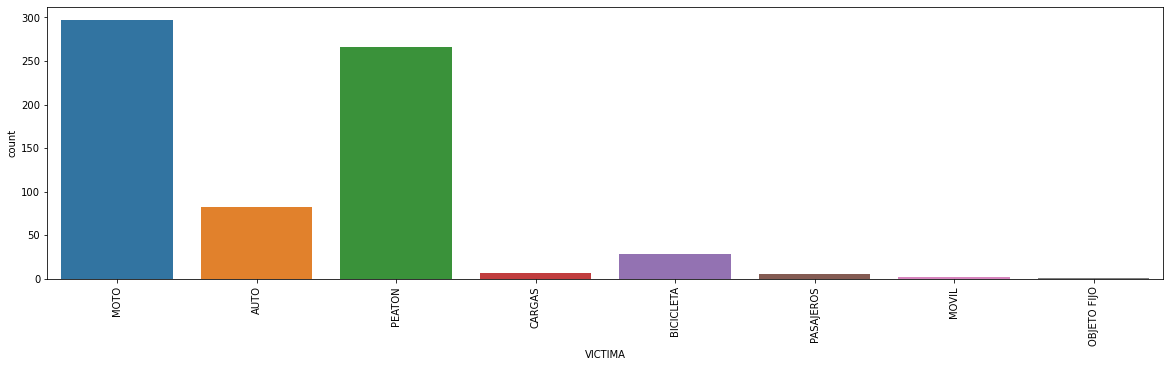

In [57]:
# Ajustar el tamaño de la figura
plt.figure(figsize = (20, 5))

# Crear el countplot para la columna 'VICTIMA' con nombres de valores en el eje x verticalmente
ax = sns.countplot(x = 'VICTIMA', data = dfHechos)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)  # Rotar los nombres de los valores en el eje x

# Cambiar la etiqueta del eje de las x por 'VICTIMA (VICTIMA_ACUSADO)'
ax.set_xlabel('VICTIMA')
# Mostrar la gráfica
plt.show()

Las motos y los peatones son las principales victimas de accidentes viales.

🏛️ Exploremos la columna __'ACUSADO'__

In [58]:
dfHechos['ACUSADO'].value_counts()

ACUSADO
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

In [59]:
dfHechos.loc[dfHechos['ACUSADO'].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,ALTURA,CRUCE,COMUNA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO_SD,MOTO,<NA>
32,2016-0045,1,2016-04-11,2016,4,11,10:25:00,10.0,AV GRAL PAZ Y AV DEL LIBERTADOR,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DEL LIBERTADOR AV.,13,Point (99620.34936816 110483.29286598),-58.46743471,-34.53476874,MOTO_SD,MOTO,<NA>
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0.0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,NaN,4,Point (. .),-58.37714647568196,-34.63657525428238,PEATON-PASAJEROS,PEATON,<NA>
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20.0,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,13,Point (. .),.,.,MOTO_SD,MOTO,<NA>
57,2016-0080,1,2016-06-18,2016,6,18,06:42:00,6.0,AV GRAL PAZ Y AV RIVADAVIA,GRAL PAZ,"PAZ, GRAL. AV.",NaN,RIVADAVIA AV.,9,Point (93950.50587297 98883.37644525),-58.52927982,-34.63931752,AUTO_SD,AUTO,<NA>
76,2016-0101,1,2016-08-07,2016,8,7,19:42:00,19.0,AV GRAL PAZ Y JORGE CHAVEZ,GRAL PAZ,"PAZ, GRAL. AV.",NaN,"CHAVEZ, JORGE",9,Point (93946.81673714 97681.68907836),-58.52932872,-34.65014993,MOTO-AUTO,MOTO,<NA>
83,2016-0110,1,2016-08-24,2016,8,24,20:21:00,20.0,AV ALBERDI Y CARHUE,AVENIDA,"ALBERDI, JUAN BAUTISTA AV.",NaN,CARHUE,9,Point (95506.35959227 96696.89655626),-58.51232237,-34.65903530,PEATON_SD,PEATON,<NA>
92,2016-0119,1,2016-09-04,2016,9,4,06:40:00,6.0,CRISOLOGO LARRALDE Y AVDA TRIUNVIRATO,AVENIDA,"LARRALDE, CRISOLOGO AV.",NaN,TRIUNVIRATO AV.,12,Point (96944.69676081 107291.52292157),-58.49659234,-34.56353635,PASAJEROS_SD,PASAJEROS,<NA>
105,2016-0135,1,2016-10-24,2016,10,24,05:00:00,5.0,AV FIGUEROA ALCORTA Y PINEDO,AVENIDA,"FIGUEROA ALCORTA, PRES. AV.",NaN,"PINEDO, INT.",14,Point (103734.76257993 107235.78328415),-58.42260225,-34.56403694,PEATON_SD,PEATON,<NA>
112,2016-0143,1,2016-11-06,2016,11,6,04:41:00,4.0,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,27 DE FEBRERO AV.,NaN,ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO_SD,MOTO,<NA>


Hagamos que el tipo de valor nulo de la columna 'ACUSADO' sean el mismo tipo NaN del resto del dataframe

In [60]:
dfHechos['ACUSADO'] = dfHechos['ACUSADO'].fillna(np.nan)

Vamos a buscar pistas en dfVictimas para ver si podemos completar los valores faltantes en la columna 'ACUSADO'<br>de dfHechos

In [61]:
dfVictimas.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

⬆️En dfVictimas no hay una columna que de informacion sobre acusados.

Veamos un panorama grafico de la columna 'ACUSADO'

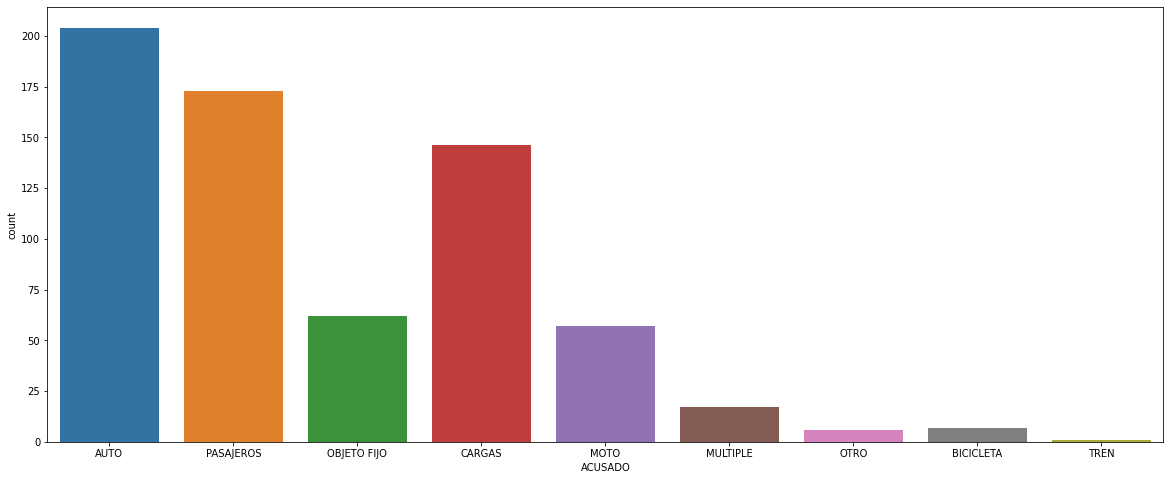

In [62]:
# Ajustar el tamaño de la figura
plt.figure(figsize = (20, 8))

# Crear el countplot para la columna 'ACUSADO'
sns.countplot(x = 'ACUSADO', data = dfHechos)

# Mostrar la gráfica
plt.show()

Vehiculos particulares, pasajeros del transporte publico y el transporte de carga son los que estan provocando mas accidentes.

🏛️ Exploremos las columnas __'XY\_(CABA)'__, __'POS_X'__ y __'POS_Y'__

Estas son columnas de datos geoespaciales lo que implica un tratamiento especial siendo el tipo de dato aun poco mas complejo. Los datos geoespaciales no son simplemente numeros o cadenas de texto, son datos espaciales que representan entidades del mundo real como puntos, lineas y poligonos. Estos datos requieren un tratamiento especial debido a su complejidad y a las diferentes formas en que pueden ser representados y almacenados.<br>
Existen diferentes sistemas de coordenadas como el Sistema de Coordenadas Geodesicas Mundial (WGS84) y el Sistema de Coordenadas Universal Transversal de Mercator (UTM). El mas comun es UTM pero segun el diccionario de datos que acompaña el dataset del proyecto las coordenadas de las columnas 'POS_X' y 'POS_Y' estan en WGS84. En cambio, la columna 'XY_(CABA)' utiliza un sistema de referencia bidimensional que se utiliza para definir la ubicacion de puntos en un plano. Se define por dos ejes perpendiculares entre si, generalmente llamados eje X y eje Y.<br><br>
🗣️ En consecuencia hemos decidido sacar estas tres columnas porque no utilizaremos graficas de mapas para la representacion geoespacial.

In [63]:
dfHechos = dfHechos.drop(['XY_(CABA)','POS_X', 'POS_Y'], axis=1)

dfHechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               696 non-null    object        
 1   N_VICTIMAS       696 non-null    int64         
 2   FECHA            696 non-null    datetime64[ns]
 3   AAAA             696 non-null    int64         
 4   MM               696 non-null    int64         
 5   DD               696 non-null    int64         
 6   HORA             696 non-null    object        
 7   HH               695 non-null    float64       
 8   LUGAR_DEL_HECHO  695 non-null    object        
 9   TIPO_DE_CALLE    696 non-null    object        
 10  CALLE            695 non-null    object        
 11  ALTURA           129 non-null    float64       
 12  CRUCE            525 non-null    object        
 13  COMUNA           696 non-null    int64         
 14  PARTICIPANTES    695 non-null    object   

In [64]:
dfHechos.describe(exclude = 'number').columns.to_list()

['ID',
 'FECHA',
 'HORA',
 'LUGAR_DEL_HECHO',
 'TIPO_DE_CALLE',
 'CALLE',
 'CRUCE',
 'PARTICIPANTES',
 'VICTIMA',
 'ACUSADO']

#### Veamos las columnas __NUMERICAS__

In [65]:
# describe() sin parametros solo muestra las columnas numericas 
dfHechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,ALTURA,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,695.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,11.657554,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,6.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,11.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,17.500000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,6.700090,3060.641793,4.387050


In [66]:
dfHechos[dfHechos.describe().columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   N_VICTIMAS  696 non-null    int64         
 1   FECHA       696 non-null    datetime64[ns]
 2   AAAA        696 non-null    int64         
 3   MM          696 non-null    int64         
 4   DD          696 non-null    int64         
 5   HH          695 non-null    float64       
 6   ALTURA      129 non-null    float64       
 7   COMUNA      696 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 43.6 KB


In [67]:
dfHechos[dfHechos.describe().columns].head(10)

,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,ALTURA,COMUNA
0,1,2016-01-01,2016,1,1,4.0,NaN,8
1,1,2016-01-02,2016,1,2,1.0,NaN,9
2,1,2016-01-03,2016,1,3,7.0,2034.0,1
3,1,2016-01-10,2016,1,10,0.0,NaN,8
4,1,2016-01-21,2016,1,21,5.0,NaN,1
5,1,2016-01-24,2016,1,24,18.0,NaN,8
6,1,2016-01-24,2016,1,24,19.0,NaN,11
7,1,2016-01-29,2016,1,29,15.0,NaN,9
8,1,2016-02-08,2016,2,8,1.0,NaN,1
9,1,2016-02-10,2016,2,10,11.0,1366.0,1


🏛️ Exploremos la columna 'N_VICTIMAS'

In [68]:
dfHechos['N_VICTIMAS'].describe()

count    696.000000
mean       1.030172
std        0.179393
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

Al menos en el 75% de los siniestros hay una sola victima

In [69]:
dfHechos['N_VICTIMAS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 696 entries, 0 to 695
Series name: N_VICTIMAS
Non-Null Count  Dtype
--------------  -----
696 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [70]:
dfHechos['N_VICTIMAS'].value_counts()

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

En apenas 20 de 696 siniestros hubo mas de una victima

Inspeccionemos la forma en la que esta distribuida la frecuencia de los valores en la columna 'N_VICTIMAS' ya que puede proporcionarnos algunas pistas sobre la presencia de outliers.

Veamos un panorama grafico de la columna 'N_VICTIMAS'

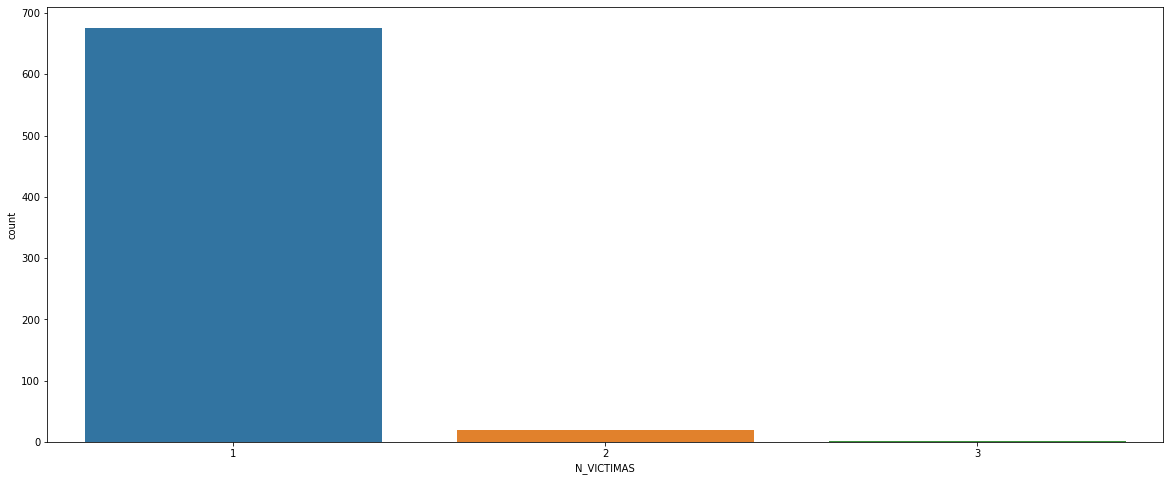

In [71]:
# Ajustar el tamaño de la figura
plt.figure(figsize = (20, 8))

# Crear el countplot para la columna 'ACUSADO'
sns.countplot(x = 'N_VICTIMAS', data = dfHechos)

# Mostrar la gráfica
plt.show()

Text(0.5, 0, 'Numero de victimas')

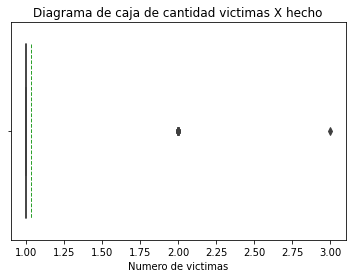

In [72]:
# Create a box plot
g = sns.boxplot(data = dfHechos, x = 'N_VICTIMAS', showmeans = True, meanline = True)

# Add a title and change xlabel
g.set_title('Diagrama de caja de cantidad victimas X hecho')
g.set_xlabel('Numero de victimas')

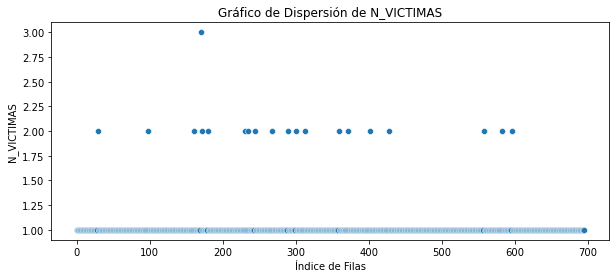

In [73]:
# Crear el gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 4))
sns.scatterplot(data=dfHechos, x=dfHechos.index, y='N_VICTIMAS')
plt.title('Gráfico de Dispersión de N_VICTIMAS')
plt.xlabel('Índice de Filas')
plt.ylabel('N_VICTIMAS')
plt.show()

Hemos conseguido valores atipicos. Los hechos que involucran dos o tres victimas seran eliminados ❌ del set de datos.

In [74]:
# Eliminar las filas donde 'N_VICTIMAS' == 2 o 'N_VICTIMAS' == 3
dfHechos = dfHechos.drop(dfHechos[(dfHechos['N_VICTIMAS'] == 2) | (dfHechos['N_VICTIMAS'] == 3)].index).reset_index(drop = True)

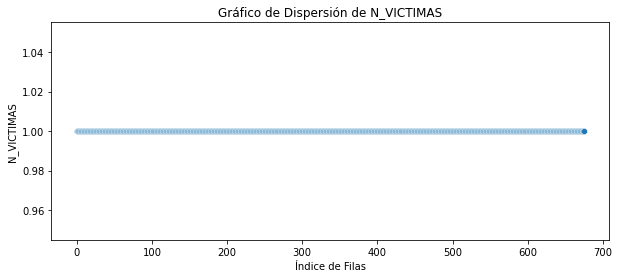

In [75]:
# Crear el gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 4))
sns.scatterplot(data=dfHechos, x=dfHechos.index, y='N_VICTIMAS')
plt.title('Gráfico de Dispersión de N_VICTIMAS')
plt.xlabel('Índice de Filas')
plt.ylabel('N_VICTIMAS')
plt.show()

In [76]:
dfHechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               676 non-null    object        
 1   N_VICTIMAS       676 non-null    int64         
 2   FECHA            676 non-null    datetime64[ns]
 3   AAAA             676 non-null    int64         
 4   MM               676 non-null    int64         
 5   DD               676 non-null    int64         
 6   HORA             676 non-null    object        
 7   HH               675 non-null    float64       
 8   LUGAR_DEL_HECHO  675 non-null    object        
 9   TIPO_DE_CALLE    676 non-null    object        
 10  CALLE            675 non-null    object        
 11  ALTURA           125 non-null    float64       
 12  CRUCE            511 non-null    object        
 13  COMUNA           676 non-null    int64         
 14  PARTICIPANTES    675 non-null    object   

🏛️ Exploremos la columna 'FECHA'

La columna 'FECHA' en el dataframe dfHechos es de naturaleza categórica. Aunque los valores en la columna 'FECHA' pueden representar horas en un formato de tiempo, en nuestro contexto de análisiss, la consideraremos una variable categórica.

La columna 'FECHA' la exploramos en la seccion de columnas no numericas.

🏛️ Exploremos la columna 'AAAA'

Cambiemos el nombre de la columna 'AAAA' por 'ANIO'

In [77]:
dfHechos.rename(columns = {'AAAA': 'ANIO'}, inplace = True)

In [78]:
dfHechos['ANIO'].describe()

count     676.000000
mean     2018.201183
std         1.694715
min      2016.000000
25%      2017.000000
50%      2018.000000
75%      2020.000000
max      2021.000000
Name: ANIO, dtype: float64

In [79]:
dfHechos['ANIO'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 676 entries, 0 to 675
Series name: ANIO
Non-Null Count  Dtype
--------------  -----
676 non-null    int64
dtypes: int64(1)
memory usage: 5.4 KB


Inspeccionemos la forma en la que esta distribuida la frecuencia de los valores en la columna 'ANIO' ya que puede proporcionarnos algunas pistas sobre la presencia de outliers.

Text(0.5, 0, 'AÑOS')

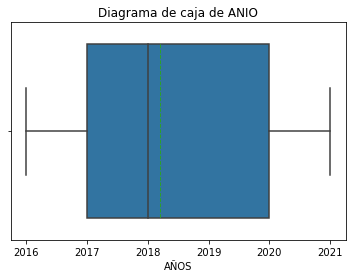

In [80]:
# Create a box plot
g = sns.boxplot(data = dfHechos, x = 'ANIO', showmeans = True, meanline = True)

# Add a title and change xlabel
g.set_title('Diagrama de caja de ANIO')
g.set_xlabel('AÑOS')

Los datos en la columna 'ANIO' estan dentro de lo esperado entre el año 2016 y 2021 sin valores fuera de este rango.

🏛️ Exploremos la columna 'MM'

In [81]:
dfHechos['MM'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 676 entries, 0 to 675
Series name: MM
Non-Null Count  Dtype
--------------  -----
676 non-null    int64
dtypes: int64(1)
memory usage: 5.4 KB


Convertiremos la columna a tipo entero de 8 bits.
- El rango de números enteros que se pueden representar con el tipo de dato int8 es de -128 a 127.<br>
- El rango de números enteros que se pueden representar con el tipo de dato int16 es de -32768 a 32767.<br>

In [82]:
# El parametro 'downcast' intentara reducir el tipo de dato al tamaño más pequeño
# posible, manteniendo la precisión de los datos.
dfHechos['MM'] = pd.to_numeric(dfHechos['MM'], errors = 'coerce', downcast = 'integer')

In [83]:
dfHechos['MM'].value_counts()

MM
12    75
11    66
8     63
1     62
5     60
6     58
2     53
7     51
10    50
4     48
3     47
9     43
Name: count, dtype: int64

⬆️ Los dos ultimos meses del año presentan el mayor numero de casos.

🏛️ Exploremos la columna 'SEMESTRE'

Debido a que el primer KPI busca reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses...
Crearemos la columna 'SEMESTRE' a partir de la columna 'HH' en donde reflejaremos el semestre 1 (primeros seis meses) y el semestre 2 (ultimos seis meses) de cada año.

In [84]:
dfHechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               676 non-null    object        
 1   N_VICTIMAS       676 non-null    int64         
 2   FECHA            676 non-null    datetime64[ns]
 3   ANIO             676 non-null    int64         
 4   MM               676 non-null    int8          
 5   DD               676 non-null    int64         
 6   HORA             676 non-null    object        
 7   HH               675 non-null    float64       
 8   LUGAR_DEL_HECHO  675 non-null    object        
 9   TIPO_DE_CALLE    676 non-null    object        
 10  CALLE            675 non-null    object        
 11  ALTURA           125 non-null    float64       
 12  CRUCE            511 non-null    object        
 13  COMUNA           676 non-null    int64         
 14  PARTICIPANTES    675 non-null    object   

In [85]:
# Crear la columna SEMESTRE
dfHechos['SEMESTRE'] = dfHechos['MM'].apply(lambda x: 1 if x <= 6 else 2).astype('int8')

# Reordenar las columnas para colocar SEMESTRE justo después de FECHA
columns = list(dfHechos.columns)
columns.remove('SEMESTRE')
columns.insert(columns.index('FECHA') + 1, 'SEMESTRE')
dfHechos = dfHechos[columns]

In [86]:
dfHechos['SEMESTRE'].value_counts()

SEMESTRE
2    348
1    328
Name: count, dtype: int64

Hay 348 en los primeros semestres de los años.<br>
Hay 328 en los segundos semestres de los años.

🏛️ Exploremos la columna 'PARTE_DIA'

Partes del día (mañana, mediodía, tarde, noche, medianoche y madrugada):
- Medianoche: Valor 0 que corresponde a la hora doce del periodo nocturno. De 0:00 a 1:00
- Madrugada: Valor 1 que va desde la medianoche hasta que sale el sol. De 1:00 a 6:30
- Mañana: Valor 2 que corresponde al periodo desde que sale el sol hasta el mediodía. De 6:30 a 12:00
- Mediodia: Valor 3 que corresponde a la hora doce del periodo diurno. De 12:00 a 13:00
- Tarde: Valor 4 que corresponde al periodo desde el mediodía hasta que se pone el sol. De 13:00 a 20:00
- Noche: Valor 5 que corresponde desde que se pone el sol hasta la medianoche. De 20:00 a 0:00

In [87]:
# Convertir la columna 'HORA' al formato de fecha y hora
dfHechos['HORA'] = pd.to_datetime(dfHechos['HORA'], format='%H:%M:%S').dt.time

# Crear la columna PARTE_DIA
def calcular_parte_dia(hora):
    if hora < datetime.time(1, 0, 0):
        return 0  # Medianoche
    elif datetime.time(1, 0, 0) <= hora < datetime.time(6, 30, 0):
        return 1  # Madrugada
    elif datetime.time(6, 30, 0) <= hora < datetime.time(12, 0, 0):
        return 2  # Mañana
    elif hora == datetime.time(12, 0, 0):
        return 3  # Mediodía
    elif datetime.time(12, 0, 0) < hora < datetime.time(20, 0, 0):
        return 4  # Tarde
    else:
        return 5  # Noche

dfHechos['PARTE_DIA'] = dfHechos['HORA'].apply(calcular_parte_dia).astype('int8')

# Reordenar las columnas para colocar PARTE_DIA justo después de HH
columns = list(dfHechos.columns)
columns.remove('PARTE_DIA')
columns.insert(columns.index('HH') + 1, 'PARTE_DIA')
dfHechos = dfHechos.reindex(columns  =columns)

In [88]:
dfHechos['PARTE_DIA'].value_counts()

PARTE_DIA
4    221
2    178
1    137
5    112
0     23
3      5
Name: count, dtype: int64

- La mayoria de los hechos ocurren por la tarde: Valor 4 que corresponde al periodo desde el mediodía hasta que se pone el sol. De 13:00 a 20:00.
- Casi no ocurren hechos al mediodia: Valor 3 que corresponde a la hora doce del periodo diurno. De 12:00 a 13:00.

In [89]:
dfHechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               676 non-null    object        
 1   N_VICTIMAS       676 non-null    int64         
 2   FECHA            676 non-null    datetime64[ns]
 3   SEMESTRE         676 non-null    int8          
 4   ANIO             676 non-null    int64         
 5   MM               676 non-null    int8          
 6   DD               676 non-null    int64         
 7   HORA             676 non-null    object        
 8   HH               675 non-null    float64       
 9   PARTE_DIA        676 non-null    int8          
 10  LUGAR_DEL_HECHO  675 non-null    object        
 11  TIPO_DE_CALLE    676 non-null    object        
 12  CALLE            675 non-null    object        
 13  ALTURA           125 non-null    float64       
 14  CRUCE            511 non-null    object   

🏛️ Exploremos la columna 'DD'

In [90]:
dfHechos['DD'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 676 entries, 0 to 675
Series name: DD
Non-Null Count  Dtype
--------------  -----
676 non-null    int64
dtypes: int64(1)
memory usage: 5.4 KB


Convertiremos la columna a tipo entero de 8 bits.
- El rango de números enteros que se pueden representar con el tipo de dato int8 es de -128 a 127.<br>
- El rango de números enteros que se pueden representar con el tipo de dato int16 es de -32768 a 32767.<br>

In [91]:
# El parametro 'downcast' intentara reducir el tipo de dato al tamaño más pequeño
# posible, manteniendo la precisión de los datos.
dfHechos['DD'] = pd.to_numeric(dfHechos['DD'], errors = 'coerce', downcast = 'integer')

In [92]:
dfHechos['DD'].value_counts()

DD
20    30
17    30
27    27
3     26
11    26
12    26
14    25
15    25
10    24
28    24
19    23
7     23
22    23
23    23
4     23
9     23
18    22
25    22
2     20
29    20
24    20
21    20
26    20
16    18
1     18
13    18
6     18
5     17
30    15
8     14
31    13
Name: count, dtype: int64

Como se esperaba los dias estan en el rango del 1 al 31.<br>
El 31 es el dia con menos casos pero hay que tener en cuenta que cinco meses del año no tienen dia 31.

🏛️ Exploremos la columna 'HH'

In [93]:
dfHechos['HH'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 676 entries, 0 to 675
Series name: HH
Non-Null Count  Dtype  
--------------  -----  
675 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB


⬆️ Hay solo un valor nulo en la columna 'HH'.<br>

- La columna 'HH' debería ser de tipo entero. En un entero de 8 o 16 bits caben todas las columnas de tipo entero del<br>
dataframe<br>
- El rango de números enteros que se pueden representar con el tipo de dato int8 es de -128 a 127.<br>
- El rango de números enteros que se pueden representar con el tipo de dato int16 es de -32768 a 32767.<br>
- Convertiremos la columna 'HH' a entero de 8 bits luego de imputar el NaN.

In [94]:
dfHechos['HH'].describe()

count    675.000000
mean      11.757037
std        6.698482
min        0.000000
25%        6.000000
50%       11.000000
75%       18.000000
max       23.000000
Name: HH, dtype: float64

La primera hora es 0, la hora media es 11 y la ultima es 23

Busquemos la hora 'HH' que falta.

In [95]:
# Filtrar las filas donde 'HH' es NaN
filasHHNan = dfHechos[dfHechos['HH'].isna()]
print('Filas que tienen el valor NaN en la columna "HH"')
# Seleccionar las columnas 'FECHA', 'HORA', 'ANIO', 'MM', 'DD', 'HH'
filasHHNan[['ID', 'FECHA', 'HORA', 'ANIO', 'MM', 'DD', 'HH']]

Filas que tienen el valor NaN en la columna "HH"


,ID,FECHA,HORA,ANIO,MM,DD,HH
501,2019-0103,2019-12-18,12:01:00,2019,12,18,NaN


Para esta fila el valor de 'HH' es NaN pero podemos usar la hora que esta en la columna 'HORA'

In [96]:
# Obtener el índice de la fila donde 'ID' es igual a '2019-0103'
i = dfHechos[dfHechos['ID'] == '2019-0103'].index[0]
dfHechos.loc[i, 'HH'] = dfHechos.loc[i, 'HORA'].hour

In [97]:
dfHechos.loc[dfHechos['ID'] == '2019-0103', ['FECHA', 'HORA', 'ANIO', 'MM', 'DD', 'HH']]

,FECHA,HORA,ANIO,MM,DD,HH
501,2019-12-18,12:01:00,2019,12,18,12.0


Ahora que no tenemos NaN en la columna 'HH', convertiremos la columna a tipo entero de 8 bits.

In [98]:
# El parametro 'downcast' intentara reducir el tipo de dato al tamaño más pequeño
# posible, manteniendo la precisión de los datos.
dfHechos['HH'] = pd.to_numeric(dfHechos['HH'], errors = 'coerce', downcast = 'integer')

In [99]:
# Imprimir los valores distintos en las columnas 'HH' y 'HORAS'
print("Valores distintos en la columna 'HH':", sorted(dfHechos['HH'].unique()))

Valores distintos en la columna 'HH': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [100]:
dfHechos['HH'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 676 entries, 0 to 675
Series name: HH
Non-Null Count  Dtype
--------------  -----
676 non-null    int8 
dtypes: int8(1)
memory usage: 804.0 bytes


🏛️ Exploremos la columna 'ALTURA'

In [101]:
n = dfHechos['ALTURA'].count()
print(f'COLUMNA   FALTAN     %\n---------------------------')
print(f'ALTURA    {len - n}        {round(100 - (n * 100) / len, 2)}')

COLUMNA   FALTAN     %
---------------------------
ALTURA    571        82.04


La columna 'ALTURA' solo tiene 129 registros de 696

🗣️ Debido al 81% de valores faltantes en la columna 'ALTURA' hemos decidido sacar esta columna del dataset.

In [102]:
dfHechos = dfHechos.drop(columns = ['ALTURA'])

🏛️ Exploremos la columna 'COMUNA'

In [103]:
dfHechos['COMUNA'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 676 entries, 0 to 675
Series name: COMUNA
Non-Null Count  Dtype
--------------  -----
676 non-null    int64
dtypes: int64(1)
memory usage: 5.4 KB


⬆️ No hay valores nulos.

In [104]:
# Cuantas veces aparece cada comuna
dfHechos['COMUNA'].value_counts()

COMUNA
1     88
4     73
9     71
8     63
7     58
3     44
15    43
13    40
12    35
14    33
11    31
10    28
2     25
5     22
6     20
0      2
Name: count, dtype: int64

En la comuna cero se presentaron dos hechos pero la comuna cero no existe.

In [105]:
# Filtrar las filas donde 'COMUNA' es igual a 0
dfHechos.loc[dfHechos['COMUNA'] == 0]

,ID,N_VICTIMAS,FECHA,SEMESTRE,ANIO,MM,DD,HORA,HH,PARTE_DIA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
117,2016-0151,1,2016-11-18,2,2016,11,18,20:35:00,20,5,<NA>,CALLE,NaN,NaN,0,PEATON_SD,PEATON,NaN
137,2016-0174,1,2016-12-27,2,2016,12,27,00:00:00,0,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,0,MOTO-CARGAS,MOTO,NaN


Busquemos filas con 'CALLE' o 'LUGAR_DEL_HECHO' igual a 'AUTOPISTA 25 DE MAYO' para ver si la comuna es la misma

In [106]:
dfHechos.loc[(dfHechos['LUGAR_DEL_HECHO'] == 'AUTOPISTA 25 DE MAYO') | (dfHechos['CALLE'] == 'AUTOPISTA 25 DE MAYO')]

,ID,N_VICTIMAS,FECHA,SEMESTRE,ANIO,MM,DD,HORA,HH,PARTE_DIA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
84,2016-0112,1,2016-08-27,2,2016,8,27,04:40:00,4,1,AUTOPISTA 25 DE MAYO AUTOPISTA 1 SUR ARTURO FR...,AUTOPISTA,AUTOPISTA 25 DE MAYO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,1,MOTO_OBJETO FIJO,MOTO,OBJETO FIJO
137,2016-0174,1,2016-12-27,2,2016,12,27,00:00:00,0,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,0,MOTO-CARGAS,MOTO,NaN
146,2017-0009,1,2017-01-16,1,2017,1,16,13:56:00,13,4,AU 25 DE MAYO Y AV. BOEDO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,5,MOTO_CARGAS,MOTO,CARGAS
153,2017-0016,1,2017-02-03,1,2017,2,3,05:12:21,5,1,"AU 25 DE MAYO, KILOMETRO 8.3, SENTIDO HACIA PR...",AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,1,MOTO_CARGAS,MOTO,CARGAS
211,2017-0092,1,2017-07-24,2,2017,7,24,22:16:01,22,5,AU 25 DE MAYO Y AU FRONDIZI (9 DE JULIO SUR),AUTOPISTA,AUTOPISTA 25 DE MAYO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,1,PEATON_AUTO,PEATON,AUTO
433,2019-0033,1,2019-04-18,1,2019,4,18,01:00:00,1,1,"AUTOPISTA 25 DE MAYO Y HUERGO, ING. AV.",AUTOPISTA,AUTOPISTA 25 DE MAYO,"HUERGO, ING. AV.",1,MOTO_SD,MOTO,NaN
538,2020-0035,1,2020-08-04,2,2020,8,4,05:30:00,5,1,"AU 25 DE MAYO ALTURA PUMACAHUA Y RECUERO, CASI...",AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,7,MOTO_PASAJEROS,MOTO,PASAJEROS
581,2021-0003,1,2021-01-10,1,2021,1,10,07:40:00,7,2,"AU 25 DE MAYO KM. 3,7",AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,7,MOTO_OBJETO FIJO,MOTO,OBJETO FIJO
611,2021-0033,1,2021-04-14,1,2021,4,14,17:50:00,17,4,AU 25 DE MAYO ALTURA BAJADA BOEDO AV.,AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,5,AUTO_OBJETO FIJO,AUTO,OBJETO FIJO
660,2021-0082,1,2021-11-06,2,2021,11,6,04:39:00,4,1,AU 25 DE MAYO KM7 (ALTURA PASCO),AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,3,MOTO_AUTO,MOTO,AUTO


La comuna 1 es la mas frecuente en hechos ocurridos en la 'AUTOPISTA 25 DE MAYO'. Al hecho '2016-0174' le pondremos la comuna 1.

In [107]:
# Cambiar el valor de la columna 'COMUNA' a 1 en la fila '2016-0174'
dfHechos.loc[dfHechos['ID'] == '2016-0174', 'COMUNA'] = 1

Al hecho '2016-0174' tambien le pondremos los valores mas comunes en la 'AUTOPISTA 25 DE MAYO': 'PARTICIPANTES' = 'MOTO_OBJETO FIJO', 'VICTIMA' = 'MOTO' y 'ACUSADO' = 'OBJETO FIJO'

In [108]:
dfHechos.loc[dfHechos['ID'] == '2016-0174', 'PARTICIPANTES'] = 'MOTO_OBJETO FIJO'
dfHechos.loc[dfHechos['ID'] == '2016-0174', 'VICTIMA'] = 'MOTO'
dfHechos.loc[dfHechos['ID'] == '2016-0174', 'ACUSADO'] = 'OBJETO FIJO'

En la otra fila en donde la comuna es cero, por la falta de datos en columnas importantes como 'PARTICIPANTES', 'ACUSADO', 'LUGAR_DEL_HECHO' y 'CALLE' hemos decidido __eliminar__ ❌ esta fila cuyo ID es igual a '2016-0151' en los dos dataframe. 

In [109]:
# Eliminar las filas donde 'ID' es igual a '2016-0151' en dfHechos
dfHechos = dfHechos.drop(dfHechos[dfHechos['ID'] == '2016-0151'].index).reset_index(drop = True)

# Eliminar las filas donde 'ID_HECHO' es igual a '2016-0151' en dfVictimas
dfVictimas = dfVictimas.drop(dfVictimas[dfVictimas['ID_hecho'] == '2016-0151'].index).reset_index(drop = True)

Inspeccionemos la forma en la que esta distribuida la frecuencia de los valores en la columna 'COMUNA' ya que puede proporcionarnos algunas pistas sobre la presencia de outliers.

In [110]:
# Crear un nuevo dataframe vacío para almacenar filas con valores no numéricos
dfNoNum = pd.DataFrame(columns=dfHechos.columns)

# Recorrer la columna 'COMUNA'
for i in range(dfHechos.shape[0]):

    # Obtener el valor de la celda actual
    valor = dfHechos.loc[i, 'COMUNA']

    # Verificar si el valor no es numérico (incluyendo NaN)
    if not isinstance(valor, (int, float, np.integer, np.floating)):

        # Agregar la fila al dataframe dfNoNum usando concat
        dfNoNum = pd.concat([dfNoNum, dfHechos.iloc[i].to_frame().T], ignore_index=True)

# Mostrar el dataframe dfNoNum
print(dfNoNum.to_string())
dfNoNum

Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, SEMESTRE, ANIO, MM, DD, HORA, HH, PARTE_DIA, LUGAR_DEL_HECHO, TIPO_DE_CALLE, CALLE, CRUCE, COMUNA, PARTICIPANTES, VICTIMA, ACUSADO]
Index: []


,ID,N_VICTIMAS,FECHA,SEMESTRE,ANIO,MM,DD,HORA,HH,PARTE_DIA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO


Text(0.5, 0, 'COMUNAS')

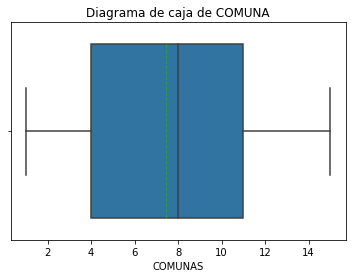

In [111]:
# Create a box plot
g = sns.boxplot(data = dfHechos, x = 'COMUNA', showmeans = True, meanline = True)

# Add a title and change xlabel
g.set_title('Diagrama de caja de COMUNA')
g.set_xlabel('COMUNAS')

No se aprecian valores atipicos en el diagrama.

### Victimas

Investigación de composicion<br>
Vamos a visualizar como estan agrupados los datos, ver sus tipos, cuantos son, nombres de columnas. A partir de esta<br> primera observacion podemos tomar algunas decisiones de accion.

In [112]:
dfVictimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             716 non-null    object        
 1   FECHA                716 non-null    datetime64[ns]
 2   AAAA                 716 non-null    int64         
 3   MM                   716 non-null    int64         
 4   DD                   716 non-null    int64         
 5   ROL                  716 non-null    object        
 6   VICTIMA              716 non-null    object        
 7   SEXO                 716 non-null    object        
 8   EDAD                 716 non-null    object        
 9   FECHA_FALLECIMIENTO  716 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Como buena practica, unificaremos el criterio para nombrar las columnas, decidimos que deben estar en mayusculas y las palabras mejor que esten separadas por un guion bajo

In [113]:
dfVictimas.rename(columns = {'ID_hecho': 'ID_HECHO'}, inplace = True)

Las columnas 'FECHA', 'AAAA', 'MM', 'DD' se repiten en el dataframe dfHechos. Como no las necesitamos las vamos a eliminar.<br>
Eliminaremos la columna 'FECHA_FALLECIMIENTO' porque ya tenemos la fecha de hecho en dfHechos.<br>
Eliminaremos las columnas 'ROL' y 'VICTIMA' porque usaremos la columna 'VICTIMA' de dfHechos para saber el tipo de victima.

In [114]:
dfVictimas = dfVictimas.drop(columns = ['FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'FECHA_FALLECIMIENTO'], axis = 1)
dfVictimas.head()

,ID_HECHO,SEXO,EDAD
0,2016-0001,MASCULINO,19
1,2016-0002,MASCULINO,70
2,2016-0003,MASCULINO,30
3,2016-0004,MASCULINO,18
4,2016-0005,MASCULINO,29


Cambiaremos todos los valores "SD" (Sin datos) a NaN. Con este cambio ayudaremos a las funciones de pandas a identificar valores faltantes (NaN).

In [115]:
dfVictimas.replace(['SD','sd'], float('nan'), inplace = True)

¿Los IDs se repiten?

In [116]:
if dfVictimas['ID_HECHO'].nunique() == dfVictimas.shape[0]: 
  print('No hay \'ID_HECHO\' repetidos')
else:
  print(f'Hay {dfVictimas.shape[0] - dfVictimas["ID_HECHO"].nunique()} \'ID_HECHO\' repetidos')

Hay 21 'ID_HECHO' repetidos


Estos 21 repetidos son debido a que hay varios hechos con mas de una victima… todo esta bien 👍

#### Veamos las columnas __no numericas__

🏛️ Exploremos la columna 'SEXO'

In [117]:
dfVictimas.describe(exclude = 'number')

,ID_HECHO,SEXO
count,716,711
unique,695,2
top,2017-0035,MASCULINO
freq,3,545


In [118]:
dfVictimas['SEXO'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 716 entries, 0 to 715
Series name: SEXO
Non-Null Count  Dtype 
--------------  ----- 
711 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Faltan cinco valores nulos en la columna 'SEXO'.<br>
Hay dos subcategorias en la columna 'SEXO'. Veamos cuales son:

In [119]:
dfVictimas['SEXO'].value_counts()

SEXO
MASCULINO    545
FEMENINO     166
Name: count, dtype: int64

¿Faltan datos en las columnas?

In [120]:
len = dfVictimas.shape[0]
print(f'COLUMNA             FALTAN     %\n--------------------------------------')
print(f'SEXO{" " * 16}{len - dfVictimas["SEXO"].count()}{" " * 10}{round(100 - (dfVictimas["SEXO"].count() * 100) / len, 2)}')
print(f'EDAD{" " * 16}{len - dfVictimas["EDAD"].count()}{" " * 9}{round(100 - (dfVictimas["EDAD"].count() * 100) / len, 2)}')

COLUMNA             FALTAN     %
--------------------------------------
SEXO                5          0.7
EDAD                52         7.26


La columna 'SEXO' tiene 711 registros de 716<br>
La columna 'EDAD' solo tiene 664 registros de 717<br>

Para mantener el balance actual imputaremos los cinco valores nulos de la columna 'SEXO' con tres masculinos y dos femeninos.

In [121]:
# Sustituir tres valores nulos por 'MASCULINO' en la columna 'SEXO'
dfVictimas['SEXO'].fillna('MASCULINO', limit = 3, inplace = True)
# Sustituir dos valores nulos por 'FEMENINO' en la columna 'SEXO'
dfVictimas['SEXO'].fillna('FEMENINO', limit = 2, inplace = True)

In [122]:
print(f'COLUMNA             FALTAN     %\n--------------------------------------')
print(f'SEXO{" " * 16}{len - dfVictimas["SEXO"].count()}{" " * 10}{round(100 - (dfVictimas["SEXO"].count() * 100) / len, 2)}')

COLUMNA             FALTAN     %
--------------------------------------
SEXO                0          0.0


Inspeccionemos la forma en la que esta distribuida la frecuencia de los valores en la columna 'SEXO' ya que puede proporcionarnos algunas pistas sobre la presencia de outliers.

Veamos un panorama grafico de la columna 'SEXO'

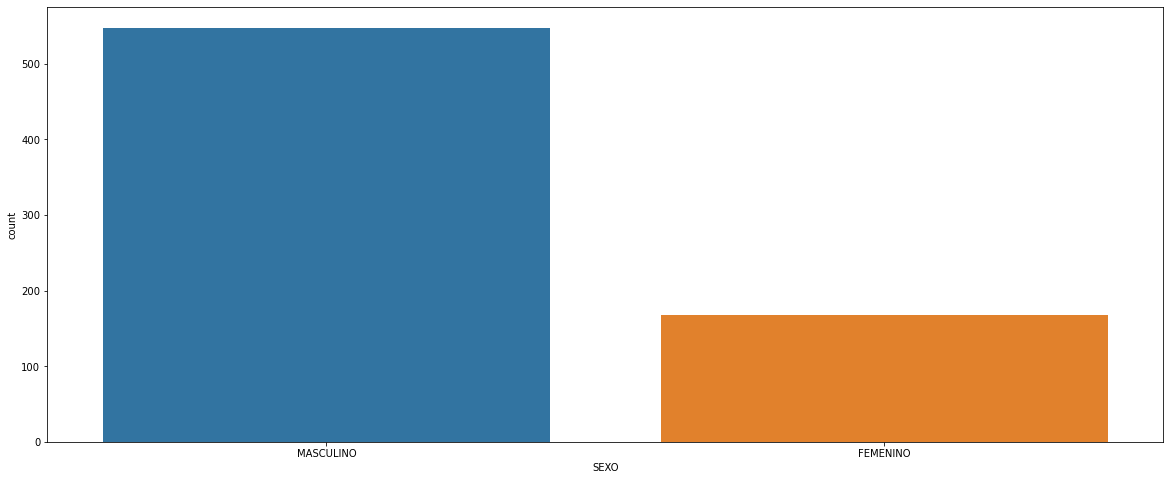

In [123]:
# Ajustar el tamaño de la figura
plt.figure(figsize = (20, 8))

# Crear el countplot para la columna 'ACUSADO'
sns.countplot(x = 'SEXO', data = dfVictimas)

# Mostrar la gráfica
plt.show()

#### Veamos las columnas numericas

🏛️ Exploremos la columna 'EDAD'

In [124]:
dfVictimas.describe()

,EDAD
count,664.000000
mean,42.167169
std,19.788034
min,1.000000
25%,27.000000
50%,37.000000
75%,56.250000
max,95.000000


Edades que van desde uno hasta los 96 años.

In [125]:
dfVictimas['EDAD'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 716 entries, 0 to 715
Series name: EDAD
Non-Null Count  Dtype  
--------------  -----  
664 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


Hay 52 edades nulas.<br>
El tipo de dato deberia ser int8.

Veamos los nulos.

In [126]:
dfVictimas[dfVictimas['EDAD'].isnull()].head()

,ID_HECHO,SEXO,EDAD
30,2016-0041,MASCULINO,NaN
33,2016-0045,MASCULINO,NaN
35,2016-0048,FEMENINO,NaN
36,2016-0049,MASCULINO,NaN
39,2016-0052,MASCULINO,NaN


Dejaremos el dato con valor nulo porque es aceptable que no se pudiera determinar la edad al momento de siniestro.

La columna 'EDAD' deberia ser de tipo entero. Los enteros ocupan poco espacio en memoria.

In [127]:
# El parametro 'downcast' intentara reducir el tipo de dato al tamaño más pequeño posible,
# manteniendo la precisión de los datos.
dfVictimas['EDAD'] = pd.to_numeric(dfVictimas['EDAD'], errors = 'coerce', downcast = 'integer')

In [128]:
dfVictimas['EDAD'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 716 entries, 0 to 715
Series name: EDAD
Non-Null Count  Dtype  
--------------  -----  
664 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


⬆️ La columna 'EDAD' ya es de tipo numerica (float64) pero no es de tipo int porque la columna contiene un NaN

Inspeccionemos la forma en la que esta distribuida la frecuencia de los valores en la columna 'EDAD' ya que puede proporcionarnos algunas pistas sobre la presencia de outliers.

Veamos un panorama grafico de la columna 'EDAD'

Text(0.5, 0, 'Numero de victimas')

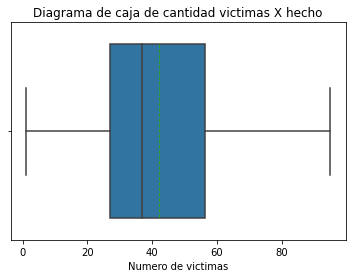

In [129]:
# Create a box plot
g = sns.boxplot(data = dfVictimas, x = 'EDAD', showmeans = True, meanline = True)

# Add a title and change xlabel
g.set_title('Diagrama de caja de cantidad victimas X hecho')
g.set_xlabel('Numero de victimas')

No se observan valores atipicos

## Carga 💾
Persistamos los datos en sendos archivos con formato CSV

In [130]:
# Guardar el dataframe dfHechos en un archivo CSV
dfHechos.to_csv('../datasource/dfHechos.csv', index = False)

# Guardar el dataframe dfVictimas en un archivo CSV
dfVictimas.to_csv('../datasource/dfVictimas.csv', index = False)

Uniremmos en una sala fuente de datos los hechos y sus victimas.

In [131]:
# Unir dfHechos con dfVictimas en el nuevo dataframe dfHechosVictimas
dfHechosVictimas = dfHechos.merge(
    dfVictimas[['ID_HECHO', 'SEXO', 'EDAD']],
    left_on = 'ID',
    right_on = 'ID_HECHO',
    how = 'inner'
)

# Eliminar la columna 'ID_HECHO'
dfHechosVictimas.drop('ID_HECHO', axis = 1, inplace = True)

In [132]:
dfHechos[dfHechos['ID'] == '2016-0077']

,ID,N_VICTIMAS,FECHA,SEMESTRE,ANIO,MM,DD,HORA,HH,PARTE_DIA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO
53,2016-0077,1,2016-06-13,1,2016,6,13,21:52:00,21,5,TTEG JUAN D PERON Y AVDA LEANDRO N ALEM,AVENIDA,"PERON, JUAN DOMINGO, TTE. GENERAL","ALEM, LEANDRO N. AV.",1,PEATON_PASAJEROS,PEATON,PASAJEROS


In [133]:
dfVictimas[dfVictimas['ID_HECHO'] == '2016-0077']

,ID_HECHO,SEXO,EDAD
55,2016-0077,FEMENINO,NaN


In [134]:
dfHechosVictimas[dfHechosVictimas['ID'] == '2016-0077']

,ID,N_VICTIMAS,FECHA,SEMESTRE,ANIO,MM,DD,HORA,HH,PARTE_DIA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,CRUCE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,SEXO,EDAD
53,2016-0077,1,2016-06-13,1,2016,6,13,21:52:00,21,5,TTEG JUAN D PERON Y AVDA LEANDRO N ALEM,AVENIDA,"PERON, JUAN DOMINGO, TTE. GENERAL","ALEM, LEANDRO N. AV.",1,PEATON_PASAJEROS,PEATON,PASAJEROS,FEMENINO,NaN


In [135]:
# Guardar el dataframe dfVictimas en un archivo CSV
dfHechosVictimas.to_csv('../datasource/dfHechosVictimas.csv', index = False)